# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import joblib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

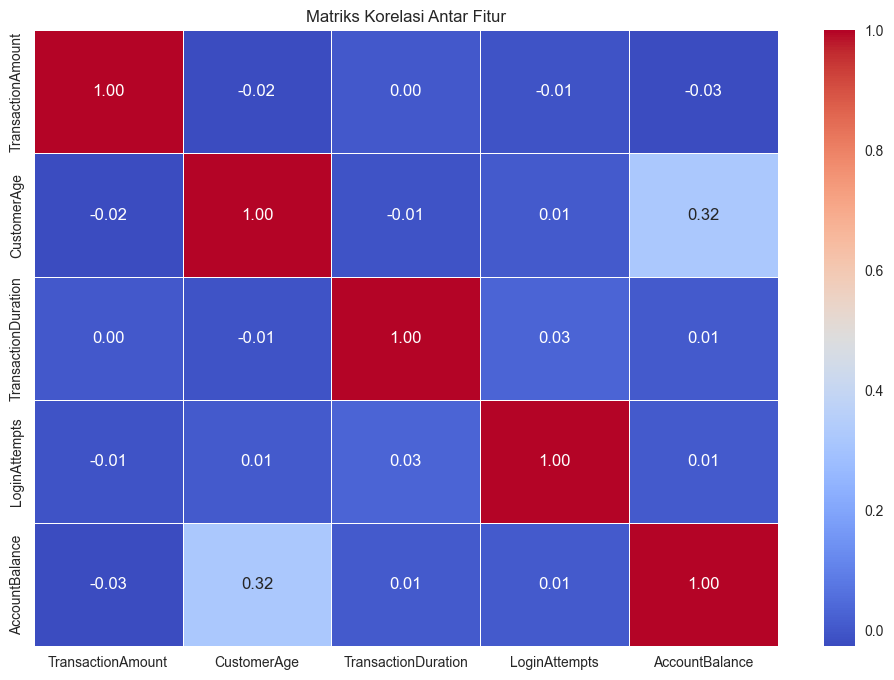

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Menghitung korelasi antar fitur
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()

# Menampilkan matriks korelasi
correlation_matrix

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

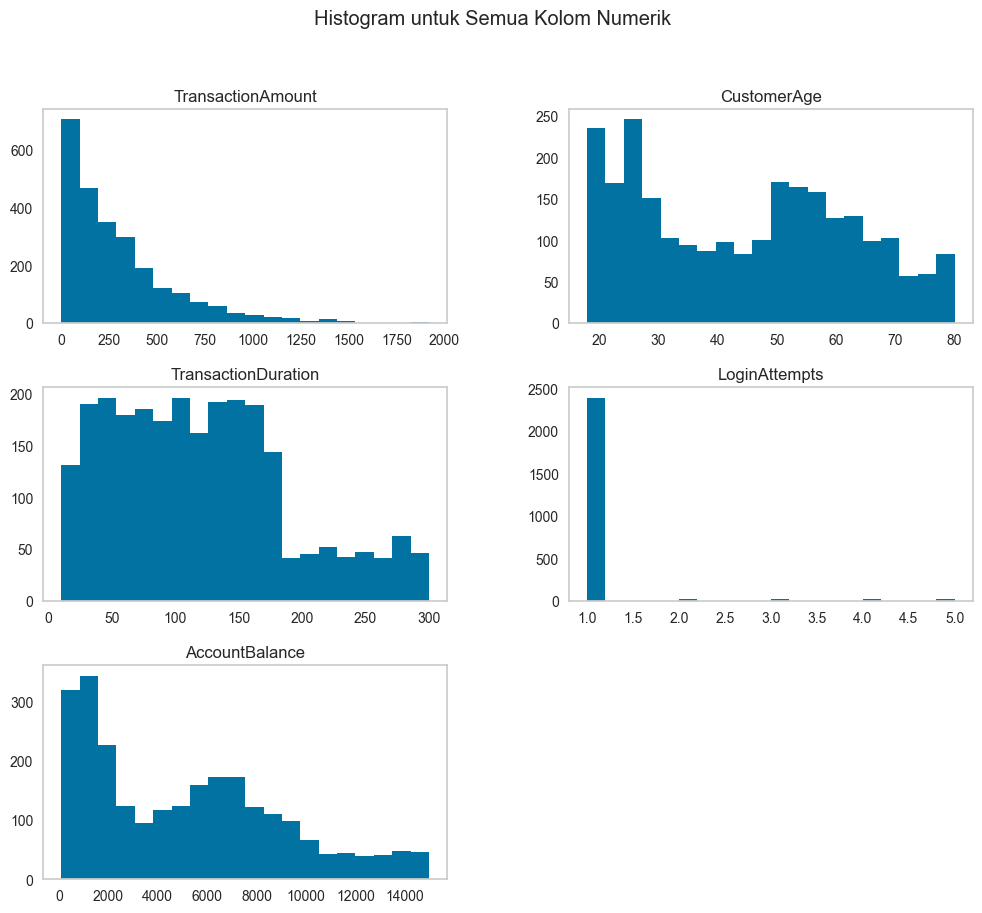

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(12, 10), grid=False)
plt.suptitle('Histogram untuk Semua Kolom Numerik')
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

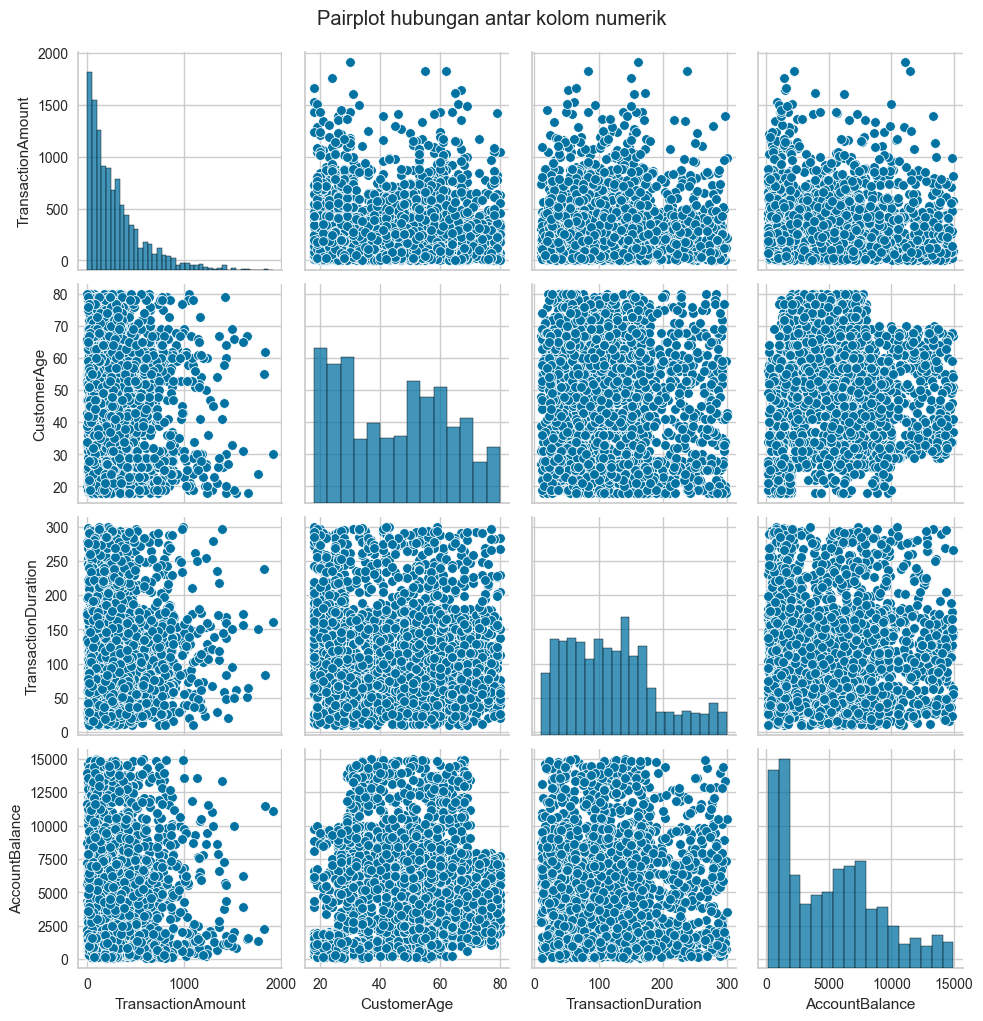

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Visualisasi pairplot untuk melihat hubungan antar kolom numerik
sns.pairplot(df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']])
plt.suptitle('Pairplot hubungan antar kolom numerik', y=1.02)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = MinMaxScaler()
# Simpan daftar kolom numerik asli yang akan di-scale dalam variabel terpisah
original_scaled_cols = df.select_dtypes(include=np.number).columns.tolist()
# Lakukan scaling pada kolom-kolom numerik asli
df[original_scaled_cols] = scaler.fit_transform(df[original_scaled_cols])
# Pastikan kamu menggunakan function head setelah melalukan scaling.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df = df.drop(columns=['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'])


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
categorical_cols = df.select_dtypes(include='object').columns
encoders = {}

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])
# Pastikan kamu menggunakan function head setelah melalukan encoding.
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Mengisi data yang hilang dengan median setiap kolom
df = df.fillna(df.median())
df.isnull().sum()

TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
print(f"Jumlah baris sebelum menghapus duplikat: {len(df)}")
df = df.drop_duplicates()
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris sebelum menghapus duplikat: 2537
Jumlah baris setelah menghapus duplikat: 2514


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
# Menerapkan metode mengganti nilai outlier dengan nilai median untuk 'TransactionAmount'

print("DataFrame sebelum handling outlier (kolom TransactionAmount):")
display(df[['TransactionAmount']].head())
print(f"Total baris awal: {len(df)}") # Keep the total row count before handling

# Menghitung IQR untuk TransactionAmount
Q1 = df['TransactionAmount'].quantile(0.25)
Q3 = df['TransactionAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mengganti outlier dengan nilai median (nilai tengah) pada TransactionAmount
median_transaction_amount = df['TransactionAmount'].median()
outliers_count = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)].shape[0]
df['TransactionAmount'] = df['TransactionAmount'].apply(lambda x: median_transaction_amount if x < lower_bound or x > upper_bound else x)

print(f"Jumlah Outlier (TransactionAmount, factor=1.5) yang diganti: {outliers_count}")

# Menampilkan data setelah penggantian outlier
print("\nDataFrame setelah handling outlier (kolom TransactionAmount):")
display(df[['TransactionAmount']].head())
# Note: Total rows will remain the same as rows were not dropped
print(f"Total baris setelah handling: {len(df)}")

DataFrame sebelum handling outlier (kolom TransactionAmount):


,TransactionAmount
0,0.007207
1,0.195940
2,0.065680
3,0.096016
4,0.006874


Total baris awal: 2514
Jumlah Outlier (TransactionAmount, factor=1.5) yang diganti: 113

DataFrame setelah handling outlier (kolom TransactionAmount):


,TransactionAmount
0,0.007207
1,0.195940
2,0.065680
3,0.096016
4,0.006874


Total baris setelah handling: 2514


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Melakukan binning pada fitur CustomerAge
# Menentukan jumlah bin atau batas bin sesuai kebutuhan. Di sini menggunakan 4 bins.
df['CustomerAge_Binned'] = pd.qcut(df['CustomerAge'], q=4, labels=False, duplicates='drop')

# Melakukan encode hasil binning menggunakan LabelEncoder
encoder_age_binned = LabelEncoder()
df['CustomerAge_Binned_Encoded'] = encoder_age_binned.fit_transform(df['CustomerAge_Binned'])

# Hapus kolom CustomerAge_Binned karena hanya CustomerAge_Binned_Encoded yang ingin disimpan
df = df.drop(columns=['CustomerAge_Binned'])

# Menampilkan beberapa baris pertama untuk melihat hasil binning dan encoding
display(df[['CustomerAge', 'CustomerAge_Binned_Encoded']].head())

# Menampilkan jumlah sampel di setiap bin
print("\nJumlah sampel di setiap bin CustomerAge:")
print(df['CustomerAge_Binned_Encoded'].value_counts())

,CustomerAge,CustomerAge_Binned_Encoded
0,0.838710,3
1,0.806452,3
2,0.016129,0
3,0.129032,0
4,0.435484,1



Jumlah sampel di setiap bin CustomerAge:
CustomerAge_Binned_Encoded
0    646
1    632
2    629
3    607
Name: count, dtype: int64


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
df.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Binned_Encoded
count,2514.000000,2514.000000,2514.000000,2514.000000,2514.00000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000,2514.000000
mean,0.131542,1256.328958,0.787987,21.284010,1.01074,0.429415,1.530231,0.377490,0.030430,0.336864,180.889021,1.476134
std,0.109968,725.581982,0.437042,12.397534,0.83084,0.286157,1.150477,0.240156,0.148674,0.260683,103.956287,1.116577
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043213,628.250000,1.000000,11.000000,0.00000,0.145161,0.250000,0.182759,0.000000,0.095324,91.250000,0.000000
50%,0.110014,1256.500000,1.000000,21.000000,1.00000,0.435484,2.000000,0.351724,0.000000,0.311416,181.000000,1.000000
75%,0.187276,1884.750000,1.000000,32.000000,2.00000,0.661290,3.000000,0.520690,0.000000,0.506870,272.000000,2.000000
max,0.467223,2485.000000,2.000000,43.000000,3.00000,1.000000,4.000000,1.000000,1.000000,1.000000,360.000000,3.000000


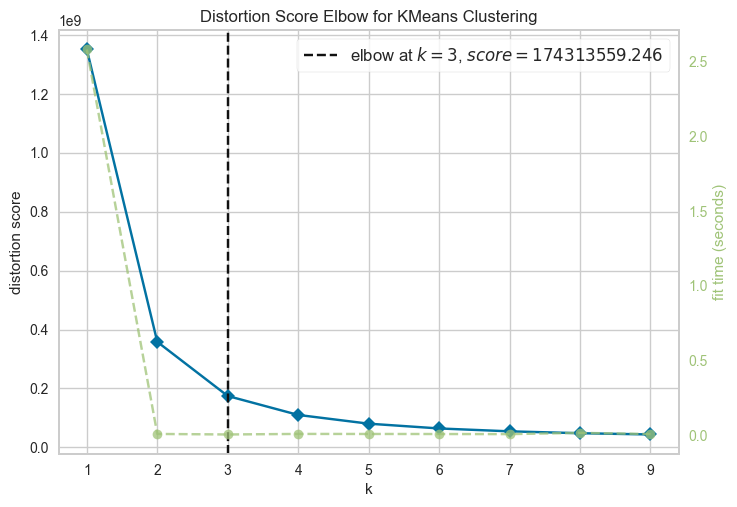

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df)
visualizer.show()

In [21]:
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df)
# Menambahkan hasil prediksi K-Means ke DataFrame
df['Cluster'] = kmeans.labels_

Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5406409291058162


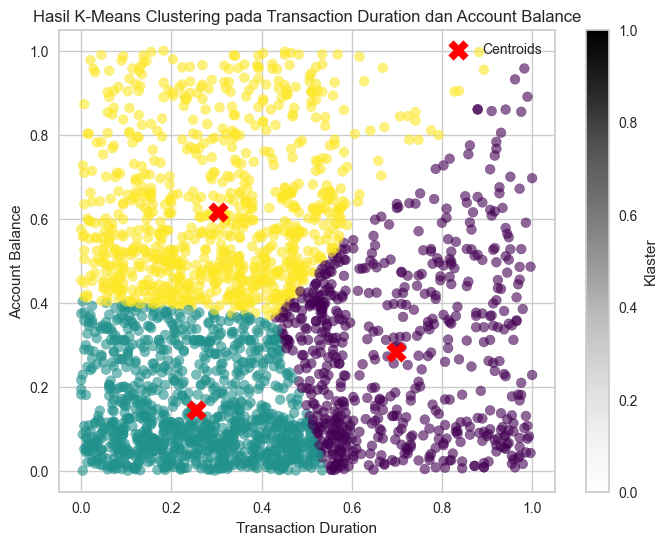

In [24]:
# Membuat visualisasi hasil clustering
X = df[['TransactionDuration', 'AccountBalance']]

# Menggunakan algoritma KMeans dengan 3 cluster
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Membuat visualisasi hasil clustering
plt.figure(figsize=(8, 6))

# Scatter plot titik data berdasarkan hasil klaster KMeans
plt.scatter(X['TransactionDuration'], X['AccountBalance'], c=kmeans.labels_, cmap='viridis', marker='o', s=50, alpha=0.6)

# Plot centroid klaster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')

# Memberikan label dan judul
plt.title('Hasil K-Means Clustering pada Transaction Duration dan Account Balance')
plt.xlabel('Transaction Duration')
plt.ylabel('Account Balance')

# Menambahkan colorbar untuk menunjukkan klaster
plt.colorbar(label='Klaster')

# Menambahkan legenda untuk membedakan titik data dan centroid
plt.legend()

# Menampilkan grid
plt.grid(True)

# Menampilkan plot
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
pca=PCA(n_components=2)
pca_result = pca.fit_transform(df)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
data_final = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
kmeans= KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(data_final)

,n_clusters,3
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Identifikasi kolom numerik dan kategorikal setelah inverse transform
numerical_cols_inverse = df.select_dtypes(include=np.number).columns.tolist()
# Hapus kolom 'Cluster' dari daftar kolom numerik karena ini adalah label klaster, bukan fitur numerik asli
if 'Cluster' in numerical_cols_inverse:
    numerical_cols_inverse.remove('Cluster')

categorical_cols_inverse = df.select_dtypes(include='object').columns.tolist()

# Lakukan analisis deskriptif per klaster (groupby 'Cluster')
print("Analisis Deskriptif per Klaster (Sebelum Inverse Transform):")

# Analisis untuk kolom numerik
if numerical_cols_inverse:
    print("\nStatistik Deskriptif Kolom Numerik per Klaster:")
    numerical_agg = df.groupby('Cluster')[numerical_cols_inverse].agg(['mean', 'min', 'max', 'median', 'std', 'count'])
    display(numerical_agg)

# Analisis untuk kolom kategorikal (mode)
if categorical_cols_inverse:
    print("\nMode Kolom Kategorikal per Klaster:")
    # Calculate mode for each categorical column per cluster
    for col in categorical_cols_inverse:
        print(f"\nMode untuk kolom: {col}")
        mode_per_cluster = df.groupby('Cluster')[col].agg(lambda x: x.mode().tolist() if not x.mode().empty else None)
        display(mode_per_cluster)

Analisis Deskriptif per Klaster (Sebelum Inverse Transform):

Statistik Deskriptif Kolom Numerik per Klaster:


TransactionAmount                                                \
                     mean       min       max    median       std count   
Cluster                                                                   
0                0.128811  0.000000  0.467223  0.110014  0.106008   837   
1                0.131111  0.000313  0.457759  0.110014  0.111510   840   
2                0.134706  0.000031  0.463809  0.110014  0.112325   837   

        TransactionDate                      ... PreviousTransactionDate  \
                   mean   min   max  median  ...                     max   
Cluster                                      ...                           
0           2094.486260  1677  2485  2095.0  ...                     360   
1            419.501190     0   840   419.5  ...                     360   
2           1257.998805   839  1676  1258.0  ...                     360   

                                 CustomerAge_Binned_Encoded                 \
        median         std count                       mean min max median   
Cluster                                                                      
0        180.0  104.904027   837                   1.459976   0   3    1.0   
1        190.0  104.001596   840                   1.427381   0   3    1.0   
2        177.0  102.923284   837                   1.541219   0   3    2.0   

                         
              std count  
Cluster                  
0        1.108854   837  
1        1.109913   840  
2        1.129121   837  

[3 rows x 72 columns]

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.

Berikut adalah interpretasi karakteristik tiap klaster, dengan fokus pada Transaction Date (Scaled) dan Account Balance (Inverse Transformed) serta mempertimbangkan konteks deteksi penipuan dan identifikasi anomali:

1. **Cluster 0: (Transaksi dengan Tanggal Transaksi Terbaru)**:
  - **Rata-rata (mean) TransactionDate:** 2094.49 (Rentang: 1677.00 - 2485.00)
  - **Rata-rata (mean) AccountBalance:** 5220.31 (Rentang: 101.25 - 14977.99)
  - **Analisis:** Klaster ini cenderung berisi transaksi yang terjadi pada tanggal-tanggal paling baru dalam dataset. Rata-rata saldo akun berada di kisaran menengah-atas. Klaster ini mungkin mewakili pola transaksi normal yang terjadi belakangan ini. Untuk deteksi penipuan, anomali dalam klaster ini (misalnya, lonjakan transaksi di luar rentang tanggal ini, jumlah transaksi yang sangat tinggi atau rendah, atau saldo akun yang tiba-tiba berubah drastis dari rata-rata klaster) perlu diperhatikan.

2. **Cluster 1: (Transaksi dengan Tanggal Transaksi Pertengahan)**:
  - **Rata-rata (mean) TransactionDate:** 419.50 (Rentang: 0.00 - 840.00)
  - **Rata-rata (mean) AccountBalance:** 5075.73 (Rentang: 102.20 - 14942.78)
  - **Analisis:** Klaster ini didominasi oleh transaksi yang terjadi pada rentang tanggal paling awal dalam dataset. Rata-rata saldo akun berada di kisaran menengah. Meskipun rata-rata transaksi dan saldo mirip dengan klaster lain, anomali dalam klaster ini bisa berupa transaksi yang tiba-tiba muncul di tanggal yang jauh lebih baru atau pola yang tidak konsisten dengan perilaku transaksi awal.

3. **Cluster 2: (Transaksi dengan Tanggal Transaksi Terlama)**:
  - **Rata-rata (mean) TransactionDate:** 1257.99 (Rentang: 839.00 - 1676.00)
  - **Rata-rata (mean) AccountBalance:** 5042.15 (Rentang: 117.98 - 14935.50)
  - **Analisis:** Klaster ini berisi transaksi dari rentang tanggal di pertengahan dataset. Rata-rata saldo akun berada di kisaran menengah. Anomali dalam klaster ini bisa berupa transaksi yang sangat besar atau kecil dibandingkan rentang normalnya, atau aktivitas yang terjadi di luar rentang tanggal khas klaster ini, terutama jika tidak sesuai dengan profil demografis (misalnya, Pensiunan di Memphis seperti dianalisis sebelumnya).

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df = df.rename(columns={'Cluster': 'Target'})

In [29]:
# Simpan Data
df.to_csv('data_clustering.csv', index=False)

In [30]:
# inverse dataset ke rentang normal untuk numerikal
df[original_scaled_cols] = scaler.inverse_transform(df[original_scaled_cols])
# tampilkan dataset yang sudah di-inverse
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Binned_Encoded,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,3,1
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,3,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,0,1
4,13.45,1939,0,1,2,45.0,3,198.0,1.0,7429.40,16,1,0


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()


print("Melakukan inverse transform pada kolom kategorikal:")
for col in categorical_cols:
    # Ensure the column is of integer type before inverse transform
    df[col] = df[col].astype(int)
    df[col] = encoders[col].inverse_transform(df[col])
    print(f"Inverse transform applied to column: {col}")

# tampilkan dataset yang sudah di-inverse
print("\nDataFrame setelah inverse transform kolom kategorikal:")
df.head()

Melakukan inverse transform pada kolom kategorikal:
Inverse transform applied to column: TransactionDate
Inverse transform applied to column: TransactionType
Inverse transform applied to column: Location
Inverse transform applied to column: Channel
Inverse transform applied to column: CustomerOccupation
Inverse transform applied to column: PreviousTransactionDate

DataFrame setelah inverse transform kolom kategorikal:


,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Binned_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1,0


In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Identifikasi kolom numerik dan kategorikal setelah inverse transform
numerical_cols_inverse = df.select_dtypes(include=np.number).columns.tolist()
# Hapus kolom 'Target' dari daftar kolom numerik karena ini adalah label klaster, bukan fitur numerik asli
if 'Target' in numerical_cols_inverse:
    numerical_cols_inverse.remove('Target')

categorical_cols_inverse = df.select_dtypes(include='object').columns.tolist()

# Lakukan analisis deskriptif per klaster (groupby 'Target')
print("Analisis Deskriptif per Klaster:")

# Analisis untuk kolom numerik
if numerical_cols_inverse:
    print("\nStatistik Deskriptif Kolom Numerik per Klaster:")
    numerical_agg = df.groupby('Target')[numerical_cols_inverse].agg(['mean', 'min', 'max', 'median', 'std', 'count'])
    display(numerical_agg)

# Analisis untuk kolom kategorikal (mode)
if categorical_cols_inverse:
    print("\nMode Kolom Kategorikal per Klaster:")
    # Calculate mode for each categorical column per cluster
    for col in categorical_cols_inverse:
        print(f"\nMode untuk kolom: {col}")
        mode_per_cluster = df.groupby('Target')[col].agg(lambda x: x.mode().tolist() if not x.mode().empty else None)
        display(mode_per_cluster)

Analisis Deskriptif per Klaster:

Statistik Deskriptif Kolom Numerik per Klaster:


TransactionAmount                                         CustomerAge  \
                    mean   min     max  median         std count        mean   
Target                                                                         
0             247.428734  0.26  896.79  211.36  203.413062   837   44.448029   
1             251.841738  0.86  878.63  211.36  213.971802   840   43.675000   
2             258.739713  0.32  890.24  211.36  215.534990   837   45.751493   

                           ... AccountBalance                              \
         min   max median  ...            max   median          std count   
Target                     ...                                              
0       18.0  80.0   45.0  ...       14977.99  4880.31  3900.103389   837   
1       18.0  80.0   43.0  ...       14942.78  4698.23  3942.961805   840   
2       18.0  80.0   48.0  ...       14935.50  4734.11  3791.794949   837   

       CustomerAge_Binned_Encoded                                 
                             mean min max median       std count  
Target                                                            
0                        1.459976   0   3    1.0  1.108854   837  
1                        1.427381   0   3    1.0  1.109913   840  
2                        1.541219   0   3    2.0  1.129121   837  

[3 rows x 36 columns]


Mode Kolom Kategorikal per Klaster:

Mode untuk kolom: TransactionDate


Target
0                                [2023-12-28 17:31:03]
1    [2023-01-02 16:00:06, 2023-01-02 16:01:14, 202...
2    [2023-05-08 18:36:59, 2023-05-09 16:47:42, 202...
Name: TransactionDate, dtype: object


Mode untuk kolom: TransactionType


Target
0    [Debit]
1    [Debit]
2    [Debit]
Name: TransactionType, dtype: object


Mode untuk kolom: Location


Target
0    [Colorado Springs, Detroit, Fort Worth]
1                                    [Miami]
2                                  [Memphis]
Name: Location, dtype: object


Mode untuk kolom: Channel


Target
0    [Branch]
1    [Branch]
2    [Branch]
Name: Channel, dtype: object


Mode untuk kolom: CustomerOccupation


Target
0    [Student]
1    [Student]
2    [Retired]
Name: CustomerOccupation, dtype: object


Mode untuk kolom: PreviousTransactionDate


Target
0                         [2024-11-04 08:11:35]
1                         [2024-11-04 08:10:23]
2    [2024-11-04 08:07:32, 2024-11-04 08:09:32]
Name: PreviousTransactionDate, dtype: object

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.

**Cluster 0: (Transaksi Terbaru)**
- **Rata-rata (mean) TransactionAmount:** Sebelum inverse: ~0.15, Setelah inverse: ~302.59
- **Rata-rata (mean) CustomerAge:** Sebelum inverse: ~0.44, Setelah inverse: ~44.45
- **Mode CustomerOccupation:** Student
- **Mode Channel:** Branch
- **Mode Location:** Colorado Springs, Detroit, Fort Worth (beberapa mode utama)
- **Analisis:**  
  Cluster ini didominasi oleh nasabah berusia muda (mahasiswa) yang sering melakukan transaksi di cabang bank pada beberapa kota besar. Nilai transaksi dan saldo akun berada pada kisaran moderat. Dalam konteks deteksi penipuan, anomali dapat muncul dari transaksi dengan nilai sangat besar atau aktivitas di lokasi yang tidak umum bagi profil nasabah di cluster ini.



**Cluster 1: (Transaksi Awal)**
- **Rata-rata (mean) TransactionAmount:** Sebelum inverse: ~0.15, Setelah inverse: ~286.32
- **Rata-rata (mean) CustomerAge:** Sebelum inverse: ~0.43, Setelah inverse: ~43.68
- **Mode CustomerOccupation:** Student
- **Mode Channel:** Branch
- **Mode Location:** Miami
- **Analisis:**  
  Cluster ini berisi transaksi dengan nilai sedikit lebih rendah dan didominasi oleh mahasiswa yang bertransaksi di cabang, khususnya di kota Miami. Anomali pada cluster ini dapat berupa transaksi dengan nilai atau durasi yang tidak biasa, terutama jika terjadi di lokasi yang berbeda dari mode utama.



**Cluster 2: (Transaksi Pertengahan)**
- **Rata-rata (mean) TransactionAmount:** Sebelum inverse: ~0.15, Setelah inverse: ~301.99
- **Rata-rata (mean) CustomerAge:** Sebelum inverse: ~0.46, Setelah inverse: ~45.75
- **Mode CustomerOccupation:** Retired
- **Mode Channel:** Branch (signifikan juga Online)
- **Mode Location:** Memphis
- **Analisis:**  
  Cluster ini didominasi oleh nasabah pensiunan dengan usia sedikit lebih tinggi, bertransaksi di cabang maupun online, terutama di kota Memphis. Anomali pada cluster ini dapat berupa pola pengeluaran yang tidak sesuai dengan profil usia atau profesi pensiunan, atau aktivitas yang terjadi di luar lokasi dan kanal utama.





(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster. (sudah di integrasikan)
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,CustomerAge_Binned_Encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,3,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,0,1
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,45.0,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,1,0


In [34]:
# Simpan Data
df.to_csv('data_clustering_inverse.csv', index=False)

End of Code.